# Imports & Initializations

In [292]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wa_parser

FILEPATH = ''
BACKGROUND_COLOR = '#f0efeb'
LOOKBACK_WEEKS = 104

plt.rcParams["font.family"] = ['Kristen ITC']
plt.rcParams["figure.facecolor"] = BACKGROUND_COLOR
plt.rcParams["axes.facecolor"] = BACKGROUND_COLOR
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.left"] = False
plt.rcParams["axes.spines.bottom"] = False

# Data Loading

In [293]:
df = wa_parser.get_df_from_chatlog(FILEPATH)
df = df[df['datetime'] > df['datetime'].max() - pd.Timedelta(weeks=LOOKBACK_WEEKS)]
df["hour"] = df["datetime"].dt.hour

# Visualizations

## Messages per Day

In [294]:
df_daily_mess = df.groupby(by=df['datetime'].dt.date)['message'].count().reset_index()
df_daily_mess["messsagecount_rm28"] = df_daily_mess["message"].rolling(28, min_periods=13, center=True).mean()
df_daily_mess

,datetime,message,messsagecount_rm28
0,2019-12-14,1,28.571429
1,2019-12-15,102,27.000000
2,2019-12-16,76,26.562500
3,2019-12-18,6,25.588235
4,2019-12-19,42,27.666667
...,...,...,...
639,2021-12-07,25,95.736842
640,2021-12-08,80,95.277778
641,2021-12-09,17,97.176471
642,2021-12-10,142,84.000000


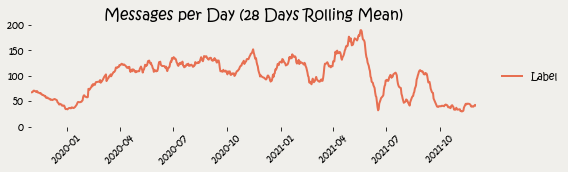

In [297]:
fig, ax = plt.subplots(figsize=(8,2.5))
sns.lineplot(data=df_daily_mess, x='datetime', y='messsagecount_rm28', ax=ax, label='Label', color='#e76f51', lw=2)
ax.set_ylim(0,200)
ax.set_xlim([datetime.date(2019, 11, 1), datetime.date(2021, 12, 1)])
ax.tick_params(axis='x', rotation=45)
ax.set_title("Messages per Day (28 Days Rolling Mean)", fontdict={"fontsize": 15})
ax.set_xlabel(None)
ax.set_ylabel(None)
plt.legend(frameon = False, bbox_to_anchor=(1.04,0.5), loc="center left")
plt.tight_layout()

## Messages per Daytime

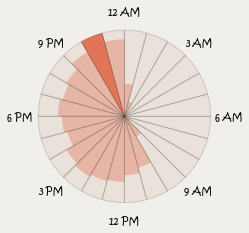

In [301]:
df_circle = df.groupby(by='hour')['message'].count().reset_index()

time = df_circle['hour']
count = df_circle['message']

c = np.zeros(24)
c[time] = count
count = c

f = plt.figure(figsize=(3.5, 3.5))
ax = plt.subplot(111, projection="polar")

x = np.arange(0, 2 * np.pi, 2 * np.pi / len(count)) + np.pi / len(count)

bars = ax.bar(x, count, width=2 * np.pi / len(count),
              alpha=0.4, color='#e76f51', bottom=0)

max_ind = np.argmax(count)
ax.bar(x[max_ind],count[max_ind], bottom=0,
       width=2 * np.pi / len(count), alpha=1, color='#e76f51')

ax.bar(x, np.max(count) * np.ones(len(count)), width=2 * np.pi / len(count),
    alpha=0.15, bottom=0, color='#cb997e', edgecolor="black")

ax.set_theta_direction(-1)
ax.grid(False)
ax.spines["polar"].set_visible(False)
ax.set_theta_offset(np.pi / 2)
ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))
ticks = ["12 AM", "", "", "3 AM", "", "", "6 AM", "", "", "9 AM",
         "", "", "12 PM", "", "", "3 PM", "", "", "6 PM", "", "",
         "9 PM", "", ""]
ax.set_xticklabels(ticks)
plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout()

## WordCloud

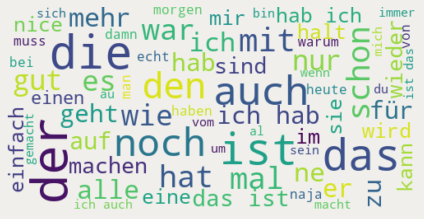

In [270]:
import os
from os import path
from wordcloud import WordCloud, STOPWORDS

messages = [word.split() for word in df["message"].values]
words = [word.lower() for sublist in messages for word in sublist]

stopwords = STOPWORDS.update(['media', 'omitted', 'missed', 'voice', 'call'])

wordcloud = WordCloud(stopwords=stopwords, max_font_size=60, width=500, height=250,
                      background_color='#f0efeb', colormap='viridis', min_word_length=2,
                      min_font_size=10).generate(' '.join(words))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()

# Statistics

In [308]:
df["words"].sum()

152256

In [306]:
df.count()

weekday     29481
datetime    29481
author      29481
message     29481
words       29481
letters     29481
hour        29481
dtype: int64

In [309]:
messages = [word.split() for word in df["message"].values]
words = [word.lower() for sublist in messages for word in sublist]
len(set(words))

15414